In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# https://matplotlib.org/stable/tutorials/introductory/customizing.html
sns.set_style("darkgrid")
matplotlib.rcParams["font.size"] = 14
matplotlib.rcParams["figure.facecolor"] = '#000'
matplotlib.rcParams["text.color"] = '#fff'

# text.color: black
# plt.text(1, 4, string, fontsize=15, color="red")

In [3]:
#loading the dataset
netflix_df = pd.read_csv("netflix_titles.csv")
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:

##Data with missing value
print(netflix_df.T.apply(lambda x: x.isnull().sum(), axis = 1))
##Handling missing value
netflix_df.director.fillna("No Director", inplace=True)
netflix_df.cast.fillna("No Cast", inplace=True)
netflix_df.country.fillna("Country Unavailable", inplace=True)
netflix_df.dropna(subset=["date_added", "rating"], inplace=True)


show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64


In [5]:
# netflix_df.type.value_counts().index

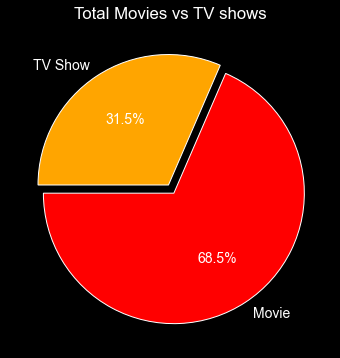

In [7]:
# 1. Netflix Content By Type
plt.figure(figsize=(12,6))
plt.title("Total Movies vs TV shows")
g = plt.pie(netflix_df.type.value_counts(),explode=(0.05,0.025), labels=netflix_df.type.value_counts().index, colors=['red','orange'],autopct='%1.1f%%', startangle=180)
plt.show()


In [8]:
#2. Amount of Content as a Function of Time
netflix_movies_df = netflix_df[netflix_df.type.str.contains("Movie")]
netflix_shows_df = netflix_df[netflix_df.type.str.contains("TV Show")]
netflix_df.year_added = pd.DatetimeIndex(netflix_df.date_added).year
netflix_movies_df.year_added = pd.DatetimeIndex(netflix_movies_df.date_added).year
netflix_shows_df.year_added = pd.DatetimeIndex(netflix_shows_df.date_added).year


c:\users\sachin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.
c:\users\sachin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """
c:\users\sachin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [9]:

netflix_year_df = netflix_df.year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})
netflix_year_df = netflix_year_df[netflix_year_df.year != 2020]

movies_year_df = netflix_movies_df.year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})
movies_year_df = movies_year_df[movies_year_df != 2020]

shows_year_df = netflix_shows_df.year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})
shows_year_df = shows_year_df[shows_year_df != 2020]


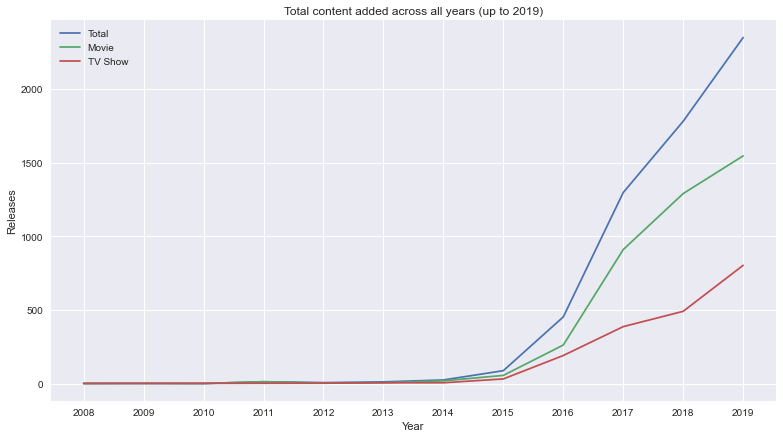

In [22]:

fig, ax = plt.subplots(figsize=(13, 7))
# plt.style.use('seaborn')
sns.lineplot(data=netflix_year_df, x='year', y='date_added')
sns.lineplot(data=movies_year_df, x='year', y='date_added')
sns.lineplot(data=shows_year_df, x='year', y='date_added')
# plt.plot(data=netflix_year_df)
# plt.plot(data=movies_year_df)
# plt.plot(data=shows_year_df)
ax.set_xticks(np.arange(2008, 2020, 1))
plt.title("Total content added across all years (up to 2019)")
plt.legend(['Total','Movie','TV Show'])
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()

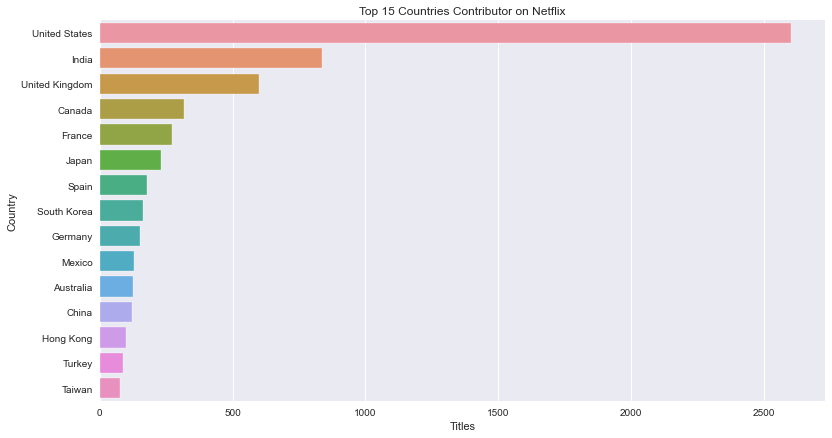

In [11]:
#3. Countries by the Amount of the Produces Content
plt.style.use("seaborn")
filtered_countries = netflix_df.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
filtered_countries = filtered_countries[filtered_countries != 'Country Unavailable']
plt.figure(figsize=(13,7))
g = sns.countplot(y = filtered_countries, order=filtered_countries.value_counts().index[:15])
plt.title('Top 15 Countries Contributor on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

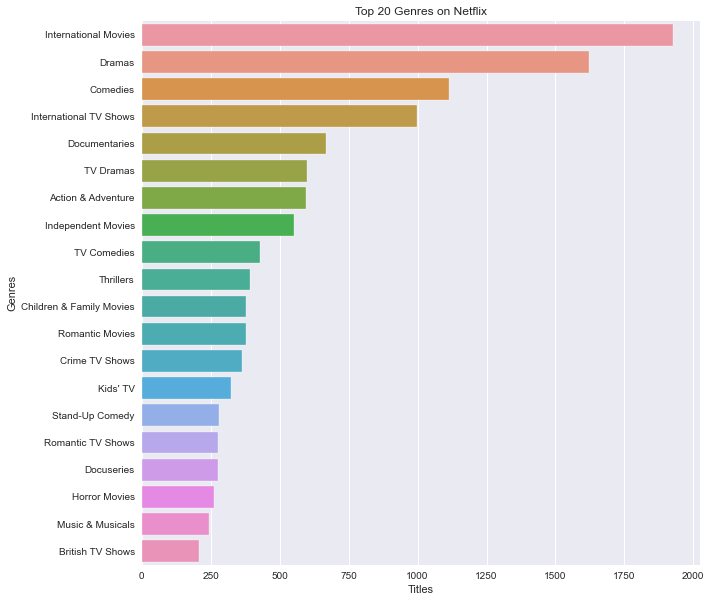

In [12]:
#5. Top Genres on Netflix
filtered_genres = netflix_df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

plt.figure(figsize=(10,10))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()